In [4]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
url='https://www.dsgap.gov.mo/pdpi/api/company/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
r=requests.get(url, headers=headers)
data=r.json()

In [30]:
data[-6]['revision']['json']['architectureList'][4]['memberList'][0]['name']['tc']

'張健'

In [117]:
edges=[]
for company in data[:1]:
    company_name=company['name']
    try:
        for council in company['revision']['json']['architectureList']:
            for member in council['memberList']:
                member_name=member.get('name').get('tc')
                if (member_name is not None) or (member_name==''):
                    edges.append((company_name, member_name))
    except:
        pass

edges=set(edges)

In [118]:
G=nx.Graph()
for edge in edges:
    G.add_nodes_from(set([j for i in edges for j in i]), weight=1)
    # if edge[0]!='澳門工業園區發展有限公司':
    G.add_edge(edge[0], edge[1])

# d=nx.degree(G)
# dd = [(d[node]+1)  for node in G.nodes()]

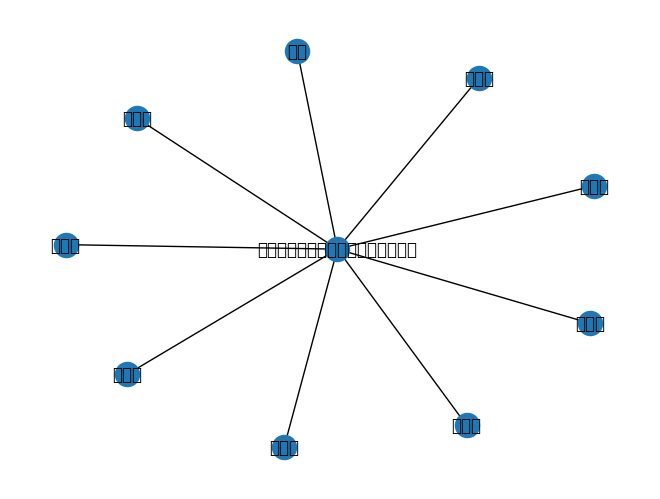

In [123]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# font_path = '/System/Library/Fonts/PingFang.ttc'  # the location of the font file
# my_font = fm.FontProperties(fname=font_path)  # get the font based on the font_path
matplotlib.rcParams['font.family']='DejaVu Sans'

nx.draw(G, with_labels=True)